In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [39]:
# Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
df = pd.read_csv(r"/content/titanic.csv")

In [42]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [44]:
df.shape

(1309, 14)

In [45]:
df.isnull().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [46]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [47]:
# taking the important column
data = df[[
    'pclass',
    'sex',
    'age',
    'sibsp',
    'parch',
    'fare',
    'embarked',
    'survived']]

In [48]:
data.isnull().sum()

,0
pclass,0
sex,0
age,263
sibsp,0
parch,0
fare,1
embarked,2
survived,0


In [49]:
data.age.mean()

np.float64(29.8811345124283)

In [50]:
data.age.median()

28.0

In [51]:
data['age'] = data['age'].fillna(data.age.mean())

/tmp/ipython-input-3404811463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].fillna(data.age.mean())


In [52]:
data.age.isnull().sum()

np.int64(0)

In [53]:
data.isnull().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,1
embarked,2
survived,0


In [54]:
data.fare.median()

14.4542

In [55]:
data.fare.mean()

np.float64(33.29547928134557)

In [56]:
data['fare'] = data.fare.fillna(data.fare.mean())

/tmp/ipython-input-2108913376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fare'] = data.fare.fillna(data.fare.mean())


In [57]:
data.isnull().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
survived,0


In [58]:
data.embarked.value_counts()

,count
embarked,
S,914
C,270
Q,123


In [59]:
data['embarked'] = data['embarked'].fillna('S')

/tmp/ipython-input-3931319089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['embarked'] = data['embarked'].fillna('S')


In [60]:
data.isnull().sum()

,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
survived,0


In [61]:
data

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,29.000000,0,0,211.3375,S,1
1,1,male,0.916700,1,2,151.5500,S,1
2,1,female,2.000000,1,2,151.5500,S,0
3,1,male,30.000000,1,2,151.5500,S,0
4,1,female,25.000000,1,2,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.500000,1,0,14.4542,C,0
1305,3,female,29.881135,1,0,14.4542,C,0
1306,3,male,26.500000,0,0,7.2250,C,0
1307,3,male,27.000000,0,0,7.2250,C,0


In [62]:
x = data.drop(['survived'],axis=1)

In [63]:
y = data['survived']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1047, 7)
(262, 7)
(1047,)
(262,)


In [66]:
X_train

,pclass,sex,age,sibsp,parch,fare,embarked
772,3,male,17.000000,0,0,7.8958,S
543,2,male,36.000000,0,0,10.5000,S
289,1,female,18.000000,0,2,79.6500,S
10,1,male,47.000000,1,0,227.5250,C
147,1,male,29.881135,0,0,42.4000,S
...,...,...,...,...,...,...,...
1095,3,female,29.881135,0,0,7.6292,Q
1130,3,female,18.000000,0,0,7.7750,S
1294,3,male,28.500000,0,0,16.1000,S
860,3,female,26.000000,0,0,7.9250,S


In [67]:
ct = ColumnTransformer([
    ("tnf1",StandardScaler(),['age','fare']),
    ("tnf2",OneHotEncoder(),['sex','embarked'])
],remainder='passthrough')



In [68]:
"""feature_names = ct.get_feature_names_out()

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=feature_names)

print(x_train_scaled_df.head())"""
#x_train_scaled = ct.fit_transform(X_train)
#x_test_scaled = ct.transform(X_test)

'feature_names = ct.get_feature_names_out()\n\nx_train_scaled_df = pd.DataFrame(x_train_scaled, columns=feature_names)\n\nprint(x_train_scaled_df.head())'

In [69]:
model = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', DecisionTreeClassifier(max_depth=32))
])


In [70]:
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', StandardScaler(),
                                                  ['age', 'fare']),
                                                 ('tnf2', OneHotEncoder(),
                                                  ['sex', 'embarked'])])),
                ('classifier', DecisionTreeClassifier(max_depth=32))])

In [71]:
y_pred = model.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.77


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


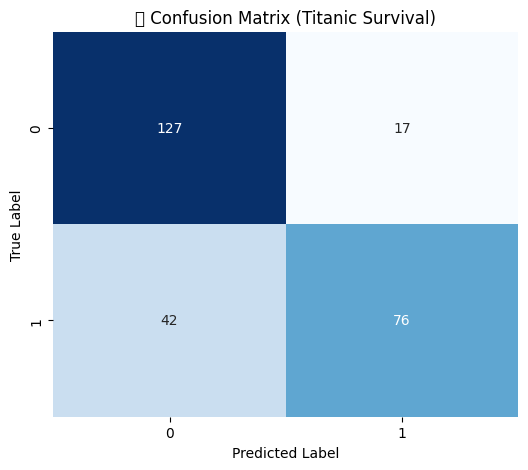

In [73]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🌀 Confusion Matrix (Titanic Survival)")
plt.show()